# Laboratorio 1 | Computer Vision

#### Integrantes
- Adrian Fulladolsa
- Renatto Guzmán

In [367]:
# Importar librerías

import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML



## Ejercicio 1

![image.png](instr/image1.png)

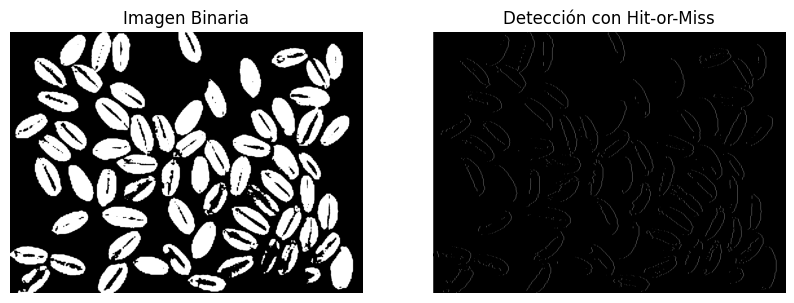

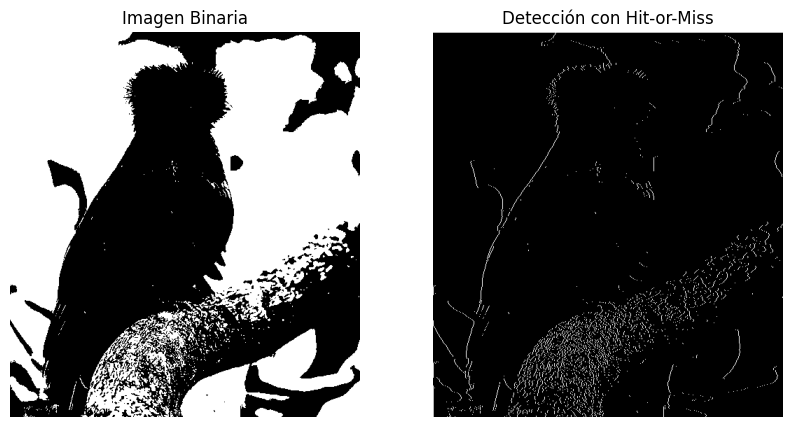

In [368]:

def hitOrMiss(path):
    # Cargar la imagen en escala de grises
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Binarizar la imagen (si no está binarizada)
    _, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Definir los elementos estructurantes para Hit-or-Miss
    # Por ejemplo, detectar esquinas superiores izquierdas
    kernel = np.array([[1, -1], 
                                  [0, 0]], dtype=np.int8)

    # Aplicar la transformación Hit-or-Miss
    hit_or_miss_result = cv2.morphologyEx(image_binary, cv2.MORPH_HITMISS, kernel)

    # Mostrar los resultados
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image_binary, cmap='gray')
    axes[0].set_title("Imagen Binaria")
    axes[0].axis("off")

    axes[1].imshow(hit_or_miss_result, cmap='gray')
    axes[1].set_title("Detección con Hit-or-Miss")
    axes[1].axis("off")

    plt.show()

# Llamar a la función con la ruta de la imagen
hitOrMiss("instr/wheat.png")
hitOrMiss("instr/quetzalgris.png")

## Ejercicio 2

![image.png](instr/image2.png)

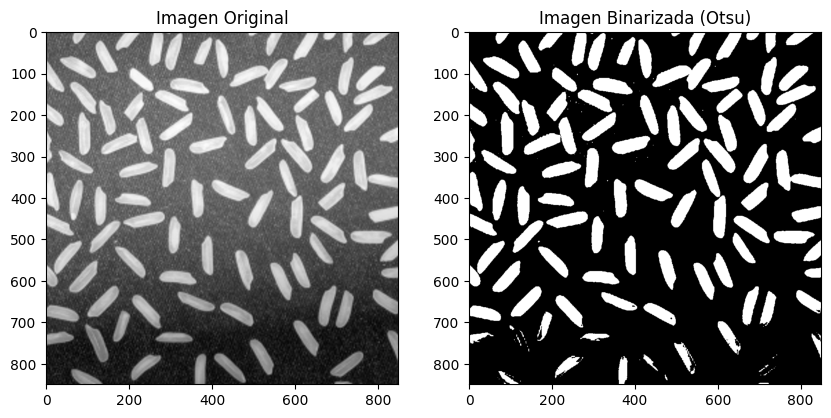

In [369]:
image_path = 'instr/rice.jpg'

# Cargar la imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar el método de Otsu para binarizar la imagen
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original y la binarizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Imagen Binarizada (Otsu)')
plt.imshow(binary_image, cmap='gray')
plt.show()


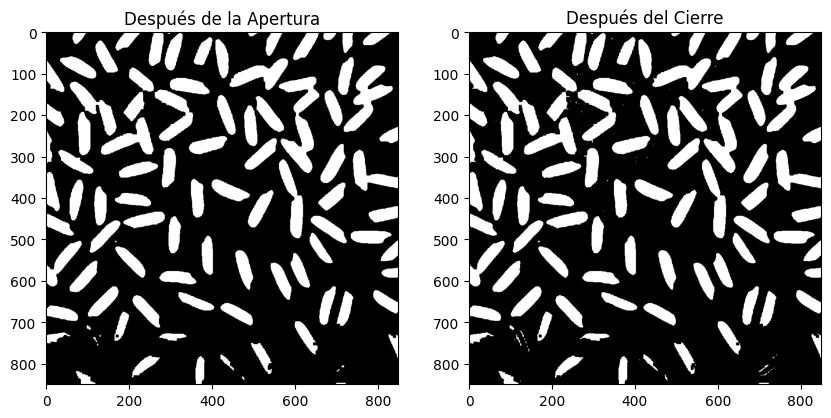

In [370]:
# Definir un kernel para las operaciones morfológicas
kernel = np.ones((3, 3), np.uint8)


closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=3)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=1)

# Mostrar la imagen después de las operaciones morfológicas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Después de la Apertura')
plt.imshow(opening, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Después del Cierre')
plt.imshow(closing, cmap='gray')
plt.show()


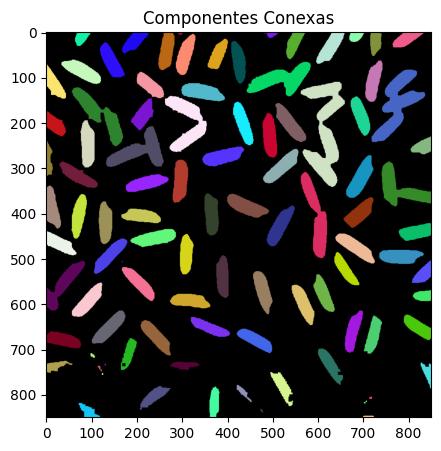

In [371]:
# Aplicar el algoritmo de componentes conexas
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening, connectivity=8)

# Crear una imagen de salida para visualizar los componentes
output_image = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)

# Asignar colores aleatorios a cada componente
for i in range(1, num_labels):
    mask = labels == i
    output_image[mask] = np.random.randint(0, 255, size=3)


# Mostrar la imagen con los componentes conexas
plt.figure(figsize=(10, 5))
plt.title('Componentes Conexas')
plt.imshow(output_image)
plt.show()

# Contar el número de granos de arroz
num_rice_grains = num_labels - 1  # Restamos 1 para excluir el fondo
# Print with a larger font size
HTML(f"<div style='font-size: 20px;'><strong>Número de granos de arroz: {num_rice_grains}</strong></div>")


## Ejercicio 3

![image.png](instr/image3.png)

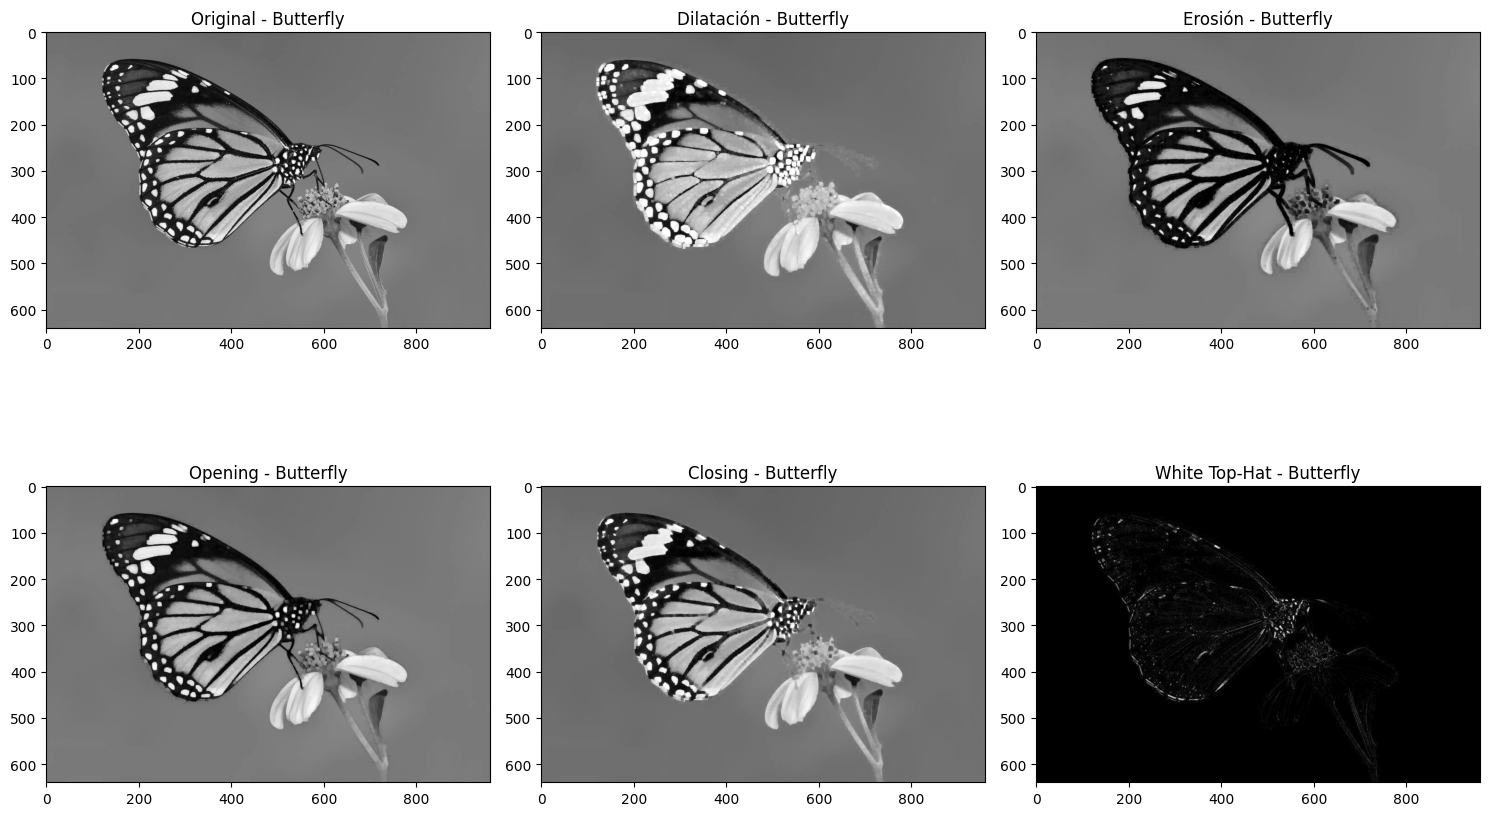

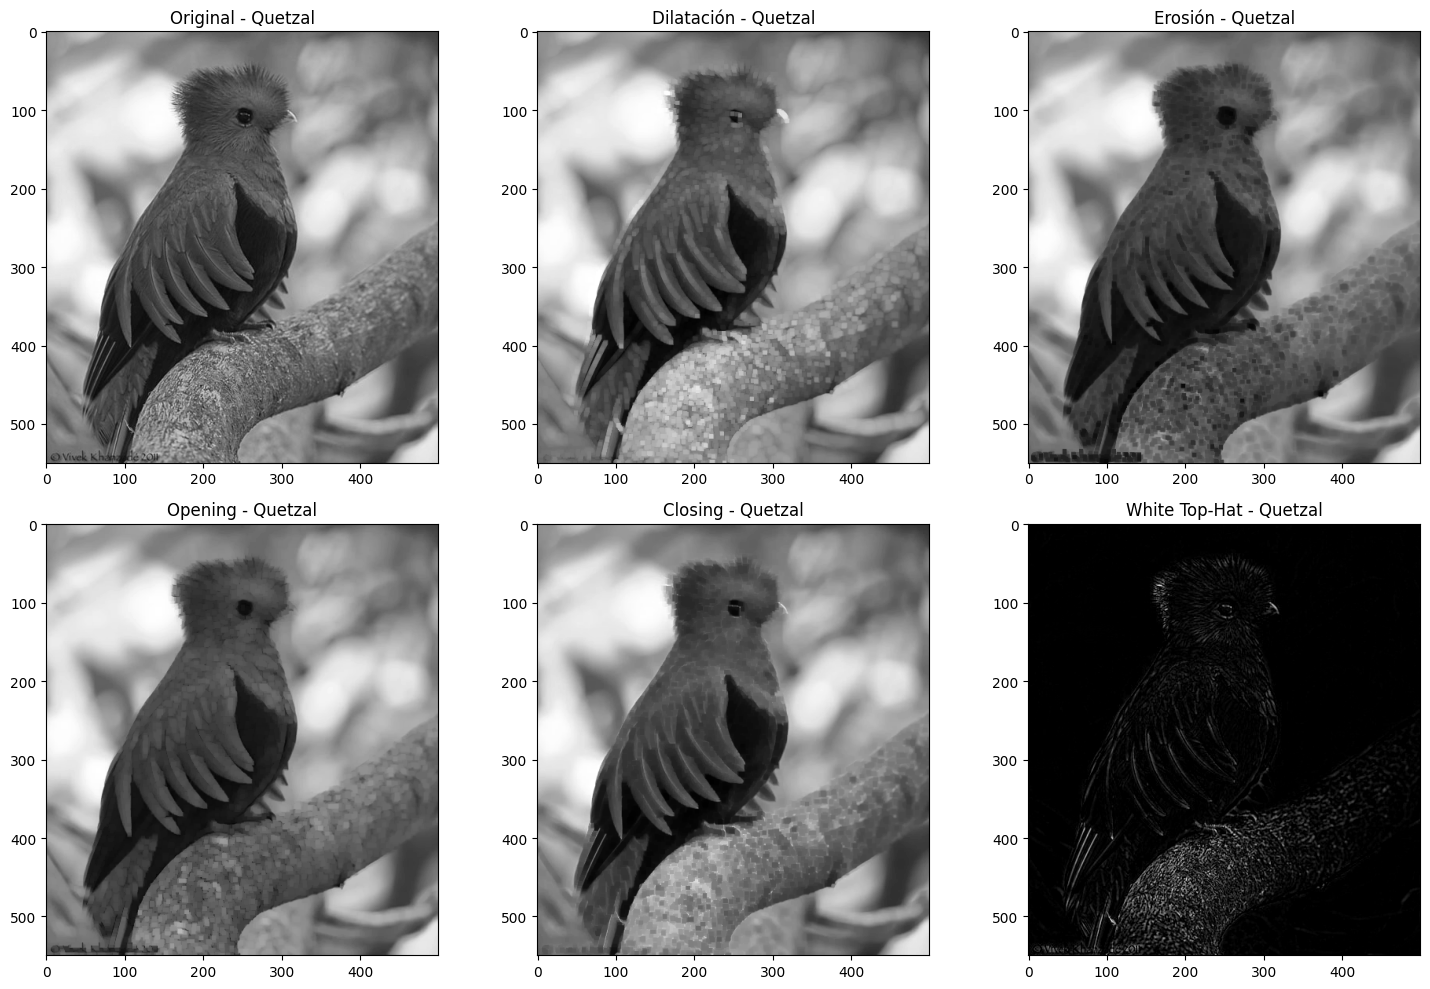

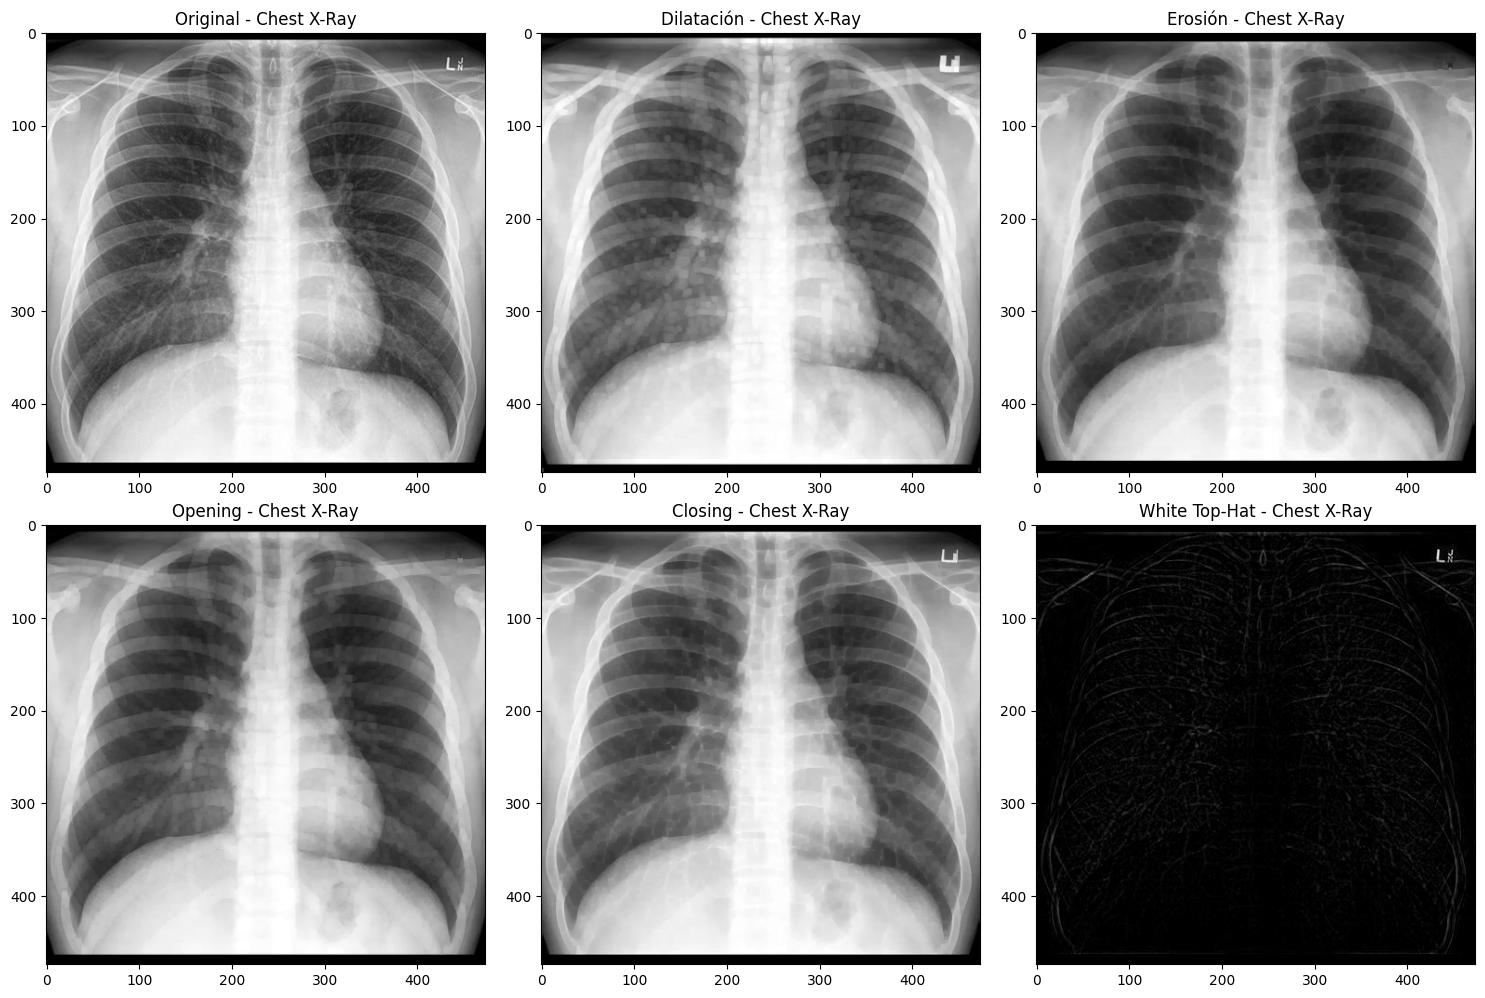

In [372]:
# Cargar las imágenes
butterfly = cv2.imread('instr/butterfly.jpeg', cv2.IMREAD_GRAYSCALE)
quetzal = cv2.imread('instr/quetzalgris.png', cv2.IMREAD_GRAYSCALE)
chest_xray = cv2.imread('instr/chestXray.jpeg', cv2.IMREAD_GRAYSCALE)

# Definir un kernel para las operaciones morfológicas
kernel = np.ones((5, 5), np.uint8)

# Aplicar operaciones morfológicas a cada imagen
def apply_morphological_operations(image, title):
    # Dilatación
    dilated = cv2.dilate(image, kernel, iterations=1)
    
    # Erosión
    eroded = cv2.erode(image, kernel, iterations=1)
    
    # Opening (Apertura)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # Closing (Cierre)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    
    # White Top-Hat
    white_tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    
    # Mostrar las imágenes
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.title(f'Original - {title}')
    plt.imshow(image, cmap='gray')
    
    plt.subplot(2, 3, 2)
    plt.title(f'Dilatación - {title}')
    plt.imshow(dilated, cmap='gray')
    
    plt.subplot(2, 3, 3)
    plt.title(f'Erosión - {title}')
    plt.imshow(eroded, cmap='gray')
    
    plt.subplot(2, 3, 4)
    plt.title(f'Opening - {title}')
    plt.imshow(opening, cmap='gray')
    
    plt.subplot(2, 3, 5)
    plt.title(f'Closing - {title}')
    plt.imshow(closing, cmap='gray')
    
    plt.subplot(2, 3, 6)
    plt.title(f'White Top-Hat - {title}')
    plt.imshow(white_tophat, cmap='gray')
    
    plt.tight_layout()
    plt.show()

# Aplicar operaciones a cada imagen
apply_morphological_operations(butterfly, 'Butterfly')
apply_morphological_operations(quetzal, 'Quetzal')
apply_morphological_operations(chest_xray, 'Chest X-Ray')


## Ejercicio 4

![image.png](instr/image4.png)

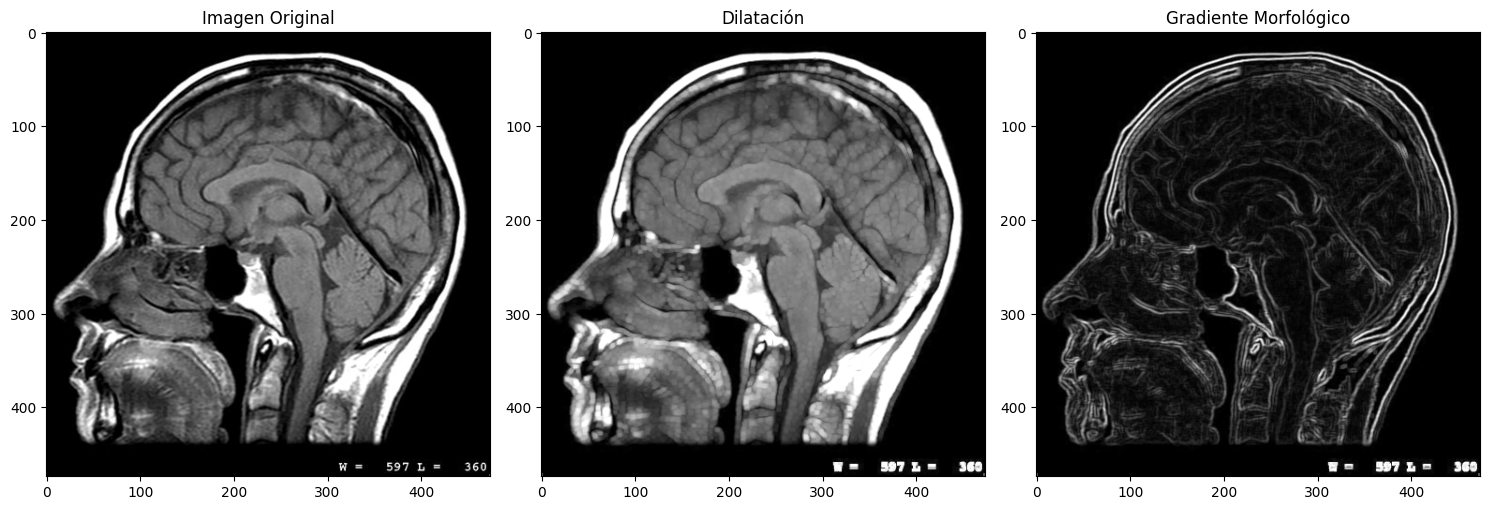

In [373]:
# Cargar la imagen en escala de grises
image = cv2.imread('instr/brain-scan.jpeg', cv2.IMREAD_GRAYSCALE)

# Definir el elemento estructurante (kernel)
kernel = np.ones((3, 3), np.uint8)

# Aplicar dilatación
dilated = cv2.dilate(image, kernel, iterations=1)

# Aplicar erosión
eroded = cv2.erode(image, kernel, iterations=1)

# Calcular el gradiente morfológico
gradient = dilated - eroded

# Mostrar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Dilatación')
plt.imshow(dilated, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Gradiente Morfológico')
plt.imshow(gradient, cmap='gray')

plt.tight_layout()
plt.show()

## Ejercicio 5

![image.png](instr/image5.png)

In [374]:
from skimage import measure
from skimage.morphology import disk, label, dilation
from skimage.measure import regionprops

In [375]:
microscopeImage = cv2.imread('instr/microscope.png')
if microscopeImage is None:
    raise FileNotFoundError("No se pudo encontrar o cargar la imagen 'microscope.png'")

if len(microscopeImage.shape) == 3:
    gris = cv2.cvtColor(microscopeImage, cv2.COLOR_BGR2GRAY)
else:
    gris = microscopeImage.copy()

if np.mean(gris) > 127:
    binaria = cv2.threshold(gris, 127, 255, cv2.THRESH_BINARY_INV)[1]
else:
    binaria = cv2.threshold(gris, 127, 255, cv2.THRESH_BINARY)[1]


In [376]:
_, binaria = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
binaria = cv2.bitwise_not(binaria)

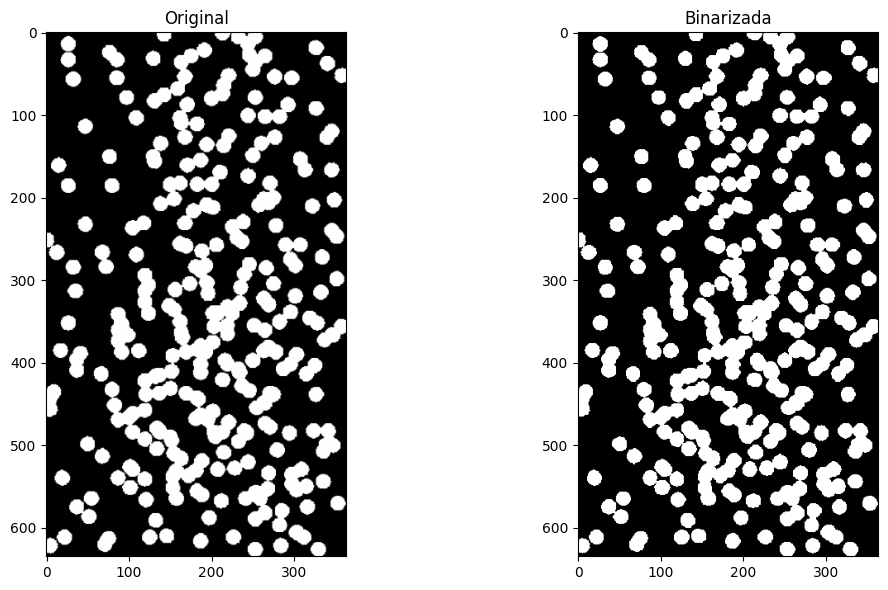

In [377]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(microscopeImage), plt.title('Original')
plt.subplot(122), plt.imshow(binaria, cmap='gray'), plt.title('Binarizada')
plt.tight_layout()
plt.show()

La componente conexa más pequeña tiene 158.0 píxeles


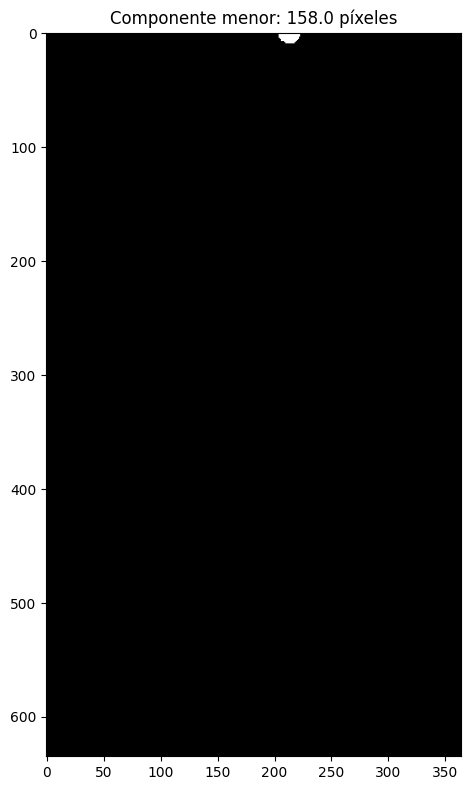

In [378]:
etiquetas = measure.label(binaria, connectivity=2)
propiedades = measure.regionprops(etiquetas)

propiedades.sort(key=lambda x: x.area)

componente_menor = propiedades[0]
print(f"La componente conexa más pequeña tiene {componente_menor.area} píxeles")

imagen_menor = np.zeros_like(binaria)
coords = componente_menor.coords
for coord in coords:
    imagen_menor[coord[0], coord[1]] = 255

plt.figure(figsize=(8, 8))
plt.imshow(imagen_menor, cmap='gray')
plt.title(f'Componente menor: {componente_menor.area} píxeles')
plt.tight_layout()
plt.show()

La componente conexa más grande tiene 4179.0 píxeles


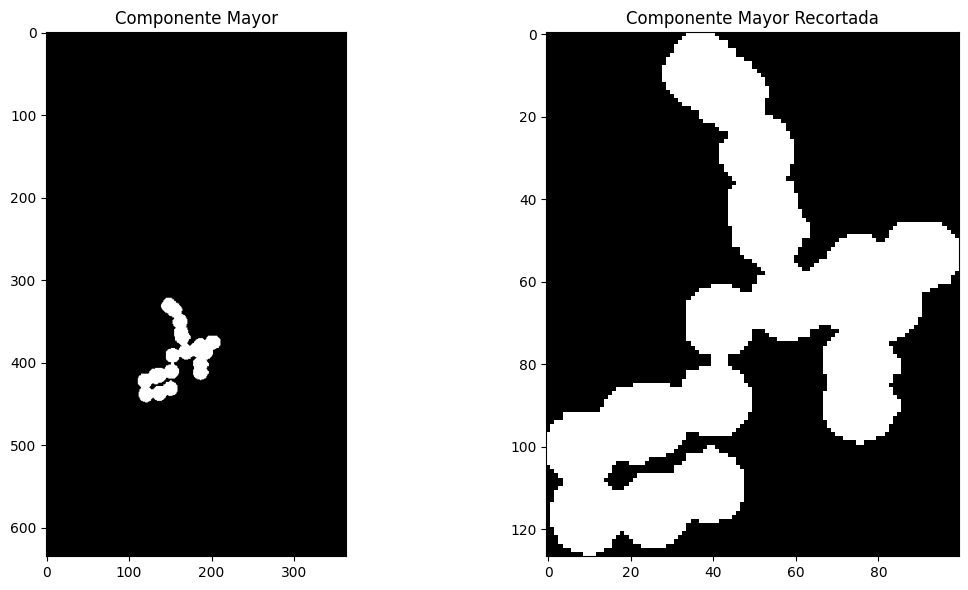

In [379]:
componente_mayor = propiedades[-1]
print(f"La componente conexa más grande tiene {componente_mayor.area} píxeles")
imagen_mayor = np.zeros_like(binaria)
min_row, min_col, max_row, max_col = componente_mayor.bbox
for i in range(len(propiedades)):
    if propiedades[i].area == componente_mayor.area:
        for coord in propiedades[i].coords:
            imagen_mayor[coord[0], coord[1]] = 255

imagen_recortada = imagen_mayor[min_row:max_row, min_col:max_col]

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(imagen_mayor, cmap='gray'), plt.title('Componente Mayor')
plt.subplot(122), plt.imshow(imagen_recortada, cmap='gray'), plt.title('Componente Mayor Recortada')
plt.tight_layout()
plt.show()

In [406]:
se_erosion = disk(3)
resultado_final = cv2.erode(binaria, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=6)

etiquetas_celulas = label(resultado_final > 0)
propiedades_celulas = regionprops(etiquetas_celulas)

num_celulas = len(propiedades_celulas)
print(f"Número de células detectadas: {num_celulas}")

area_minima = 20
propiedades_celulas_filtradas = [prop for prop in propiedades_celulas if prop.area >= area_minima]
num_celulas_filtradas = len(propiedades_celulas_filtradas)
print(f"Número de células después de filtrar por tamaño: {num_celulas_filtradas}")

# Crear etiquetas para células filtradas
etiquetas_filtradas = np.zeros_like(etiquetas_celulas)
for i, prop in enumerate(propiedades_celulas_filtradas, 1):
    etiquetas_filtradas[etiquetas_celulas == prop.label] = i

# Crear imagen coloreada para mostrar las células identificadas
imagen_celulas = np.zeros((etiquetas_filtradas.shape[0], etiquetas_filtradas.shape[1], 3), dtype=np.uint8)
colors = plt.cm.jet(np.linspace(0, 1, num_celulas_filtradas+1))

for i in range(1, num_celulas+1):
    mask = etiquetas_celulas == i
    for c in range(3):
        imagen_celulas[mask, c] = int(colors[i][c] * 255)



Número de células detectadas: 177
Número de células después de filtrar por tamaño: 177


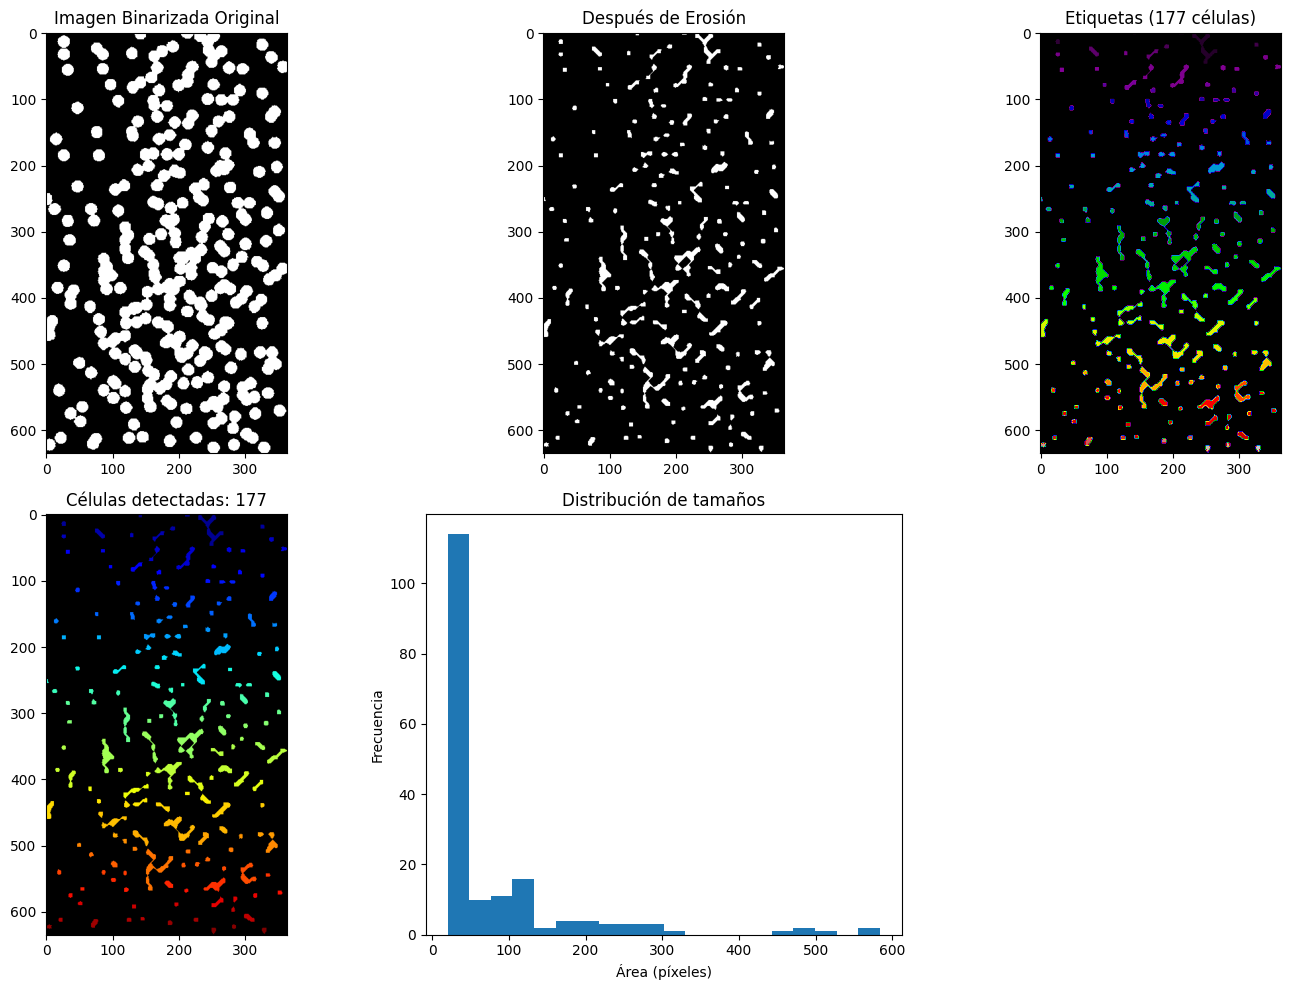

In [408]:
# Crear visualizaciones más detalladas para entender el proceso
plt.figure(figsize=(15, 10))

# Primera fila: Proceso de separación de células
plt.subplot(231), plt.imshow(binaria, cmap='gray'), plt.title('Imagen Binarizada Original')
plt.subplot(232), plt.imshow(erosion, cmap='gray'), plt.title('Después de Erosión')

plt.subplot(233), plt.imshow(etiquetas_celulas, cmap='nipy_spectral'),
plt.title(f'Etiquetas ({num_celulas} células)')
plt.subplot(234), plt.imshow(imagen_celulas),
plt.title(f'Células detectadas: {num_celulas}')

areas = [prop.area for prop in propiedades_celulas]
plt.subplot(235), plt.hist(areas, bins=20), plt.title('Distribución de tamaños')
plt.xlabel('Área (píxeles)'), plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [332]:
print("\nRESUMEN:")
print(f"1. Componente más pequeña: {componente_menor.area} píxeles")
print(f"2. Componente más grande: {componente_mayor.area} píxeles")
print(f"3. Número de células detectadas: {num_celulas}")


RESUMEN:
1. Componente más pequeña: 158.0 píxeles
2. Componente más grande: 4179.0 píxeles
3. Número de células detectadas: 177


## Ejercicio 6

![image.png](instr/image6.png)

In [333]:
from skimage import morphology
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
import random

In [334]:
wheatImagen = cv2.imread('instr/wheat.png')
wheatImagen_original = wheatImagen.copy()

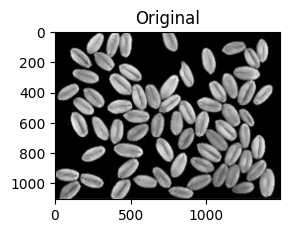

In [335]:
# Convertir a escala de grises
gris = cv2.cvtColor(wheatImagen, cv2.COLOR_BGR2GRAY)
plt.subplot(221), plt.imshow(gris, cmap='gray'), plt.title('Original')
plt.show()

In [336]:
_, umbral = cv2.threshold(gris, 20, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
apertura = cv2.morphologyEx(umbral, cv2.MORPH_OPEN, kernel, iterations=10)
dilatacion = cv2.dilate(apertura, kernel, iterations=1)

In [337]:
mapa_distancia = ndimage.distance_transform_edt(apertura)
coords = peak_local_max(mapa_distancia, min_distance=20, labels=apertura)
mask = np.zeros(mapa_distancia.shape, dtype=bool)
mask[tuple(coords.T)] = True
marcadores, num_objetos = ndimage.label(mask)

In [338]:
etiquetas = watershed(-mapa_distancia, marcadores, mask=dilatacion)
etiquetas_procesadas = etiquetas.copy()

for label in range(1, etiquetas.max() + 1):
    mascara = etiquetas == label
    if np.sum(mascara) < 100:
        etiquetas_procesadas[mascara] = 0

etiquetas_unicas = np.unique(etiquetas_procesadas)
etiquetas_unicas = etiquetas_unicas[etiquetas_unicas > 0]  # Excluir el fondo
num_objetos_filtrados = len(etiquetas_unicas)
mapa_clases = np.zeros((etiquetas_procesadas.shape[0], etiquetas_procesadas.shape[1], 3), dtype=np.uint8)

In [339]:
np.random.seed(101)
colores = {0: [0, 0, 0]}

for i, label in enumerate(etiquetas_unicas, 1):
    colores[label] = np.random.randint(50, 256, size=3, dtype=np.uint8)

for label in etiquetas_unicas:
    mapa_clases[etiquetas_procesadas == label] = colores[label]

In [340]:
imagen_rgb = cv2.cvtColor(wheatImagen_original, cv2.COLOR_BGR2RGB)
mascara_granos = etiquetas_procesadas > 0
alpha = 0.5
imagen_combinada = imagen_rgb.copy()

In [341]:
for label in etiquetas_unicas:
    mascara = etiquetas_procesadas == label
    imagen_combinada[mascara] = cv2.addWeighted(
        imagen_rgb[mascara], 1-alpha,
        mapa_clases[mascara], alpha,
        0)

# Dibuja los contornos sobre la imagen combinada
for label in etiquetas_unicas:
    mascara = (etiquetas_procesadas == label).astype(np.uint8)
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(imagen_combinada, contornos, -1, colores[label].tolist(), 1)

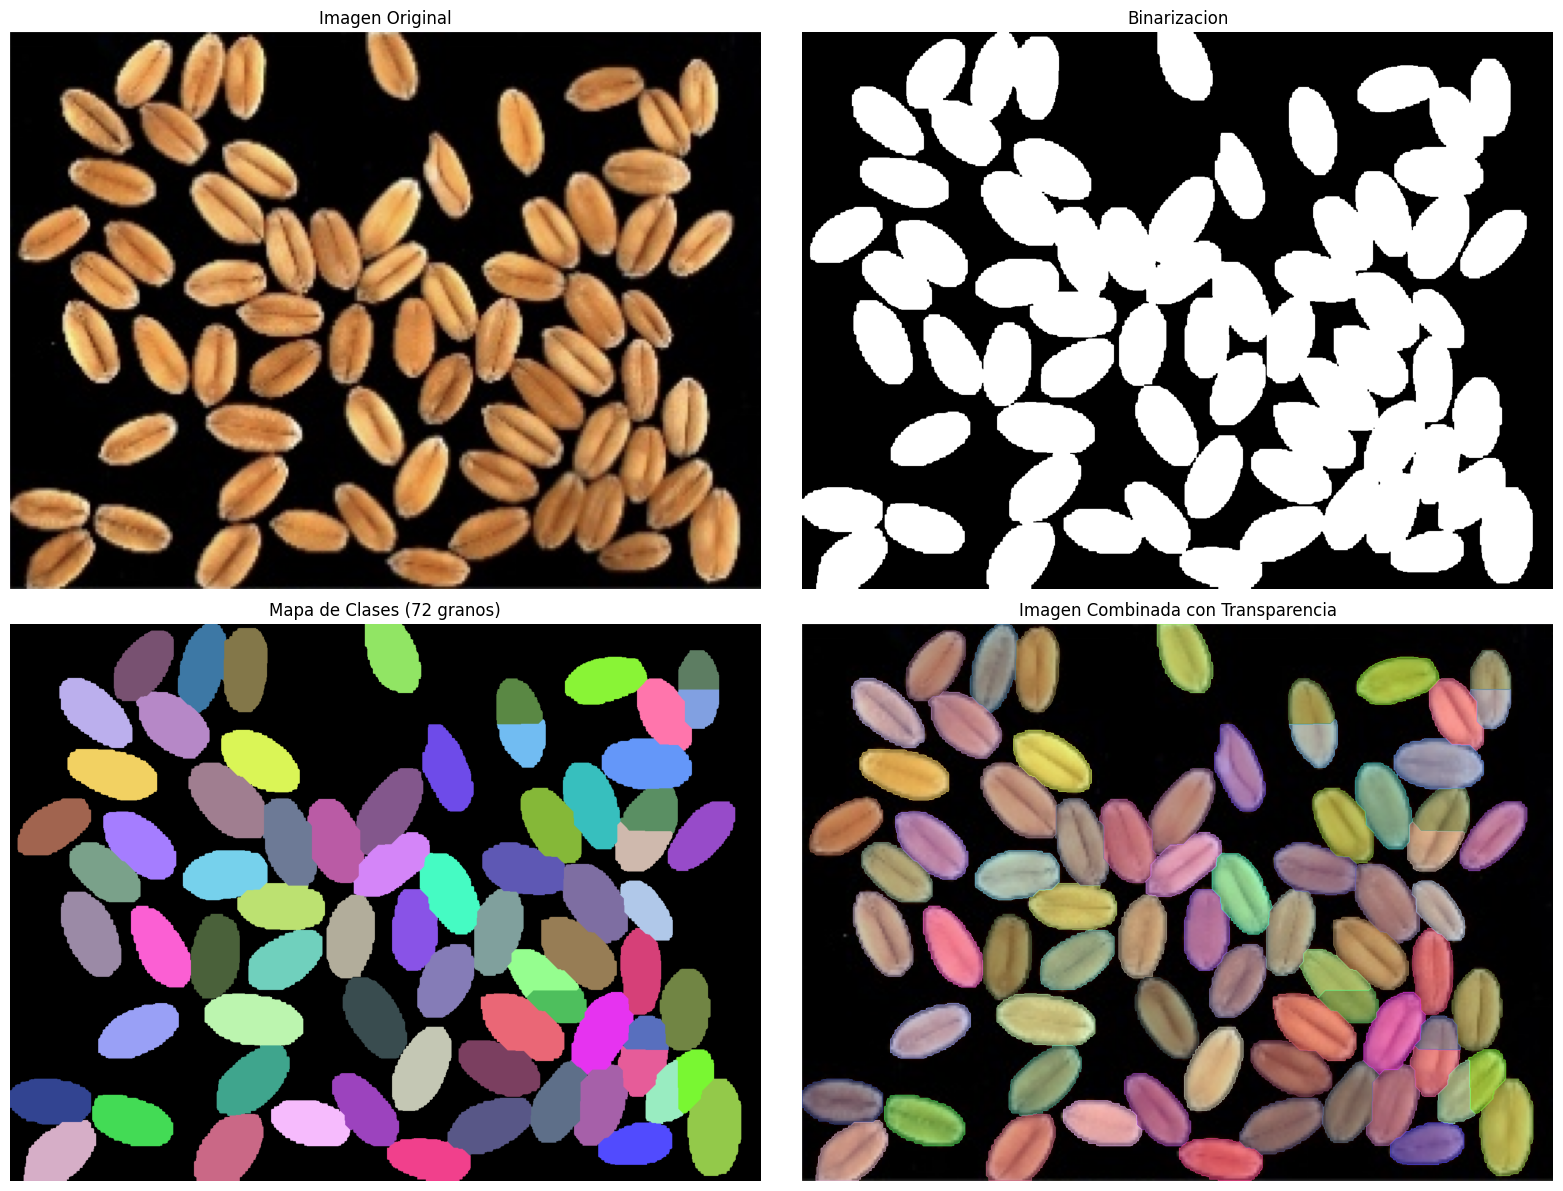

Se han detectado 72 granos de trigo.


In [342]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(apertura, cmap='gray')
plt.title('Binarizacion')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(mapa_clases)
plt.title(f'Mapa de Clases ({num_objetos_filtrados} granos)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(imagen_combinada)
plt.title('Imagen Combinada con Transparencia')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Se han detectado {num_objetos_filtrados} granos de trigo.")

## Ejercicio 7

![image.png](instr/image7.png)

In [343]:
from skimage import io, morphology, segmentation, color, filters
from skimage.morphology import skeletonize, medial_axis

In [344]:
def mostrar_imagenes(imagenes, titulos, filas=1):
    """
    Función auxiliar para mostrar múltiples imágenes con sus títulos.
    """
    columnas = len(imagenes) // filas + (1 if len(imagenes) % filas != 0 else 0)
    plt.figure(figsize=(columnas * 4, filas * 4))

    for i, (imagen, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(filas, columnas, i + 1)
        if len(imagen.shape) == 2:  # Imagen en escala de grises
            plt.imshow(imagen, cmap='gray')
        else:  # Imagen a color
            plt.imshow(imagen)
        plt.title(titulo)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [345]:
def preparar_imagen(ruta_imagen):
    """
    Carga una imagen y la convierte a binaria.
    """
    # Cargar imagen
    imagen = io.imread(ruta_imagen)

    # Convertir a escala de grises si es necesario
    if len(imagen.shape) > 2:
        imagen_gris = color.rgb2gray(imagen)
    else:
        imagen_gris = imagen

    # Aplicar un umbral para obtener una imagen binaria
    umbral = filters.threshold_otsu(imagen_gris)
    imagen_binaria = imagen_gris < umbral

    return imagen, imagen_gris, imagen_binaria

In [346]:
def esqueletizacion(imagen_binaria):
    """
    Realiza la esqueletización de una imagen binaria.
    Retorna el esqueleto usando dos métodos: skeletonize y medial_axis.
    """
    # Método 1: Usando skeletonize
    esqueleto1 = skeletonize(imagen_binaria)

    # Método 2: Usando medial_axis (eje medio)
    esqueleto2, distancia = medial_axis(imagen_binaria, return_distance=True)

    return esqueleto1, esqueleto2, distancia

In [347]:
def transformada_distancia_borde(imagen_binaria):
    """
    Calcula la transformada de distancia desde el borde de los objetos.
    """
    # Método 1: Usando scikit-image
    dist_transform_sk = ndimage.distance_transform_edt(imagen_binaria)

    # Método 2: Usando OpenCV
    dist_transform_cv = cv2.distanceTransform(
        np.uint8(imagen_binaria),
        cv2.DIST_L2,
        maskSize=5
    )

    # Normalizar para visualización
    dist_transform_cv_norm = cv2.normalize(
        dist_transform_cv,
        None,
        0,
        1.0,
        cv2.NORM_MINMAX
    )

    return dist_transform_sk, dist_transform_cv_norm

In [348]:
def transformada_distancia_esqueleto(imagen_binaria):
    """
    Calcula la transformada de distancia desde el esqueleto.
    """
    # Primero obtenemos el esqueleto
    esqueleto = skeletonize(imagen_binaria)

    # La transformada de distancia desde el esqueleto es la distancia
    # desde cada pixel del objeto al pixel más cercano del esqueleto

    # 1. Invertimos el esqueleto para calcular la distancia
    esqueleto_invertido = np.logical_not(esqueleto)

    # 2. Aplicamos la máscara de la imagen binaria original
    # para solo considerar los pixeles del objeto
    mascara = np.logical_and(esqueleto_invertido, imagen_binaria)

    # 3. Calculamos la transformada de distancia
    dist_desde_esqueleto = ndimage.distance_transform_edt(mascara)

    return esqueleto, dist_desde_esqueleto

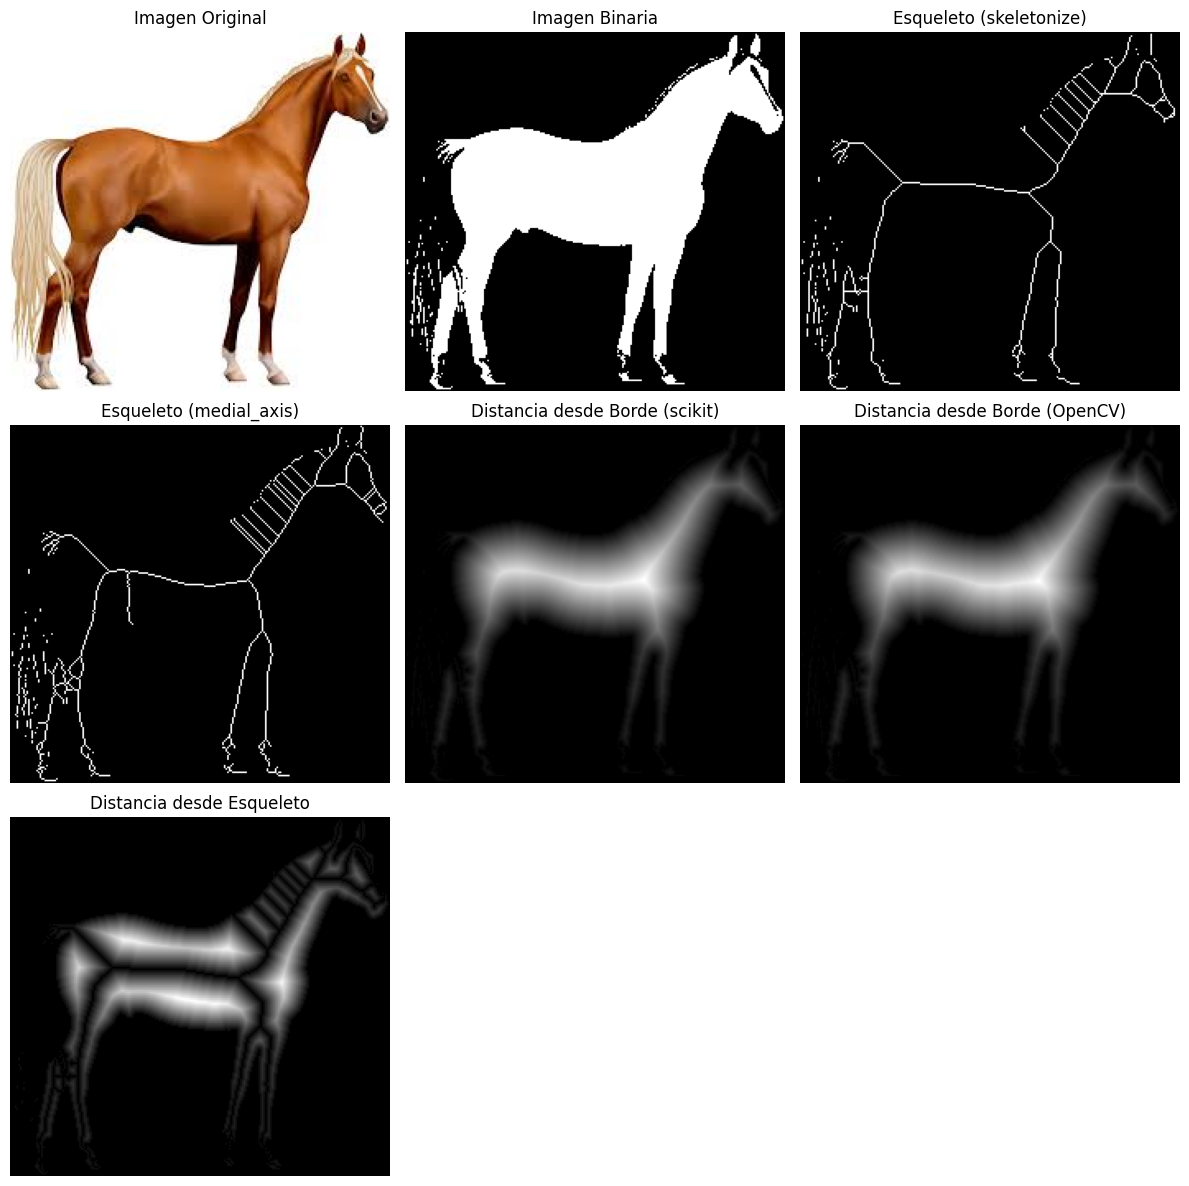

In [349]:
# Preparar la imagen
imagen_original, imagen_gris, imagen_binaria = preparar_imagen("instr/horse.jpeg")

# (i) Esqueletización
esqueleto1, esqueleto2, dist_medial = esqueletizacion(imagen_binaria)

# (ii) Transformada de distancia desde el borde
dist_borde_sk, dist_borde_cv = transformada_distancia_borde(imagen_binaria)

# (iii) Transformada de distancia desde el esqueleto
esqueleto, dist_esqueleto = transformada_distancia_esqueleto(imagen_binaria)

# Mostrar resultados
mostrar_imagenes(
    [imagen_original, imagen_binaria,
     esqueleto1, esqueleto2,
     dist_borde_sk, dist_borde_cv,
     dist_esqueleto],
    ['Imagen Original', 'Imagen Binaria',
     'Esqueleto (skeletonize)', 'Esqueleto (medial_axis)',
     'Distancia desde Borde (scikit)', 'Distancia desde Borde (OpenCV)',
     'Distancia desde Esqueleto'],
    filas=3
)

## Ejercicio 8

![image.png](instr/image8.png)

In [350]:
def pruning_esqueleto(esqueleto, n_iteraciones=5):
    """
    Implementación alternativa de poda utilizando operaciones morfológicas.

    Parámetros:
    esqueleto: Imagen binaria del esqueleto
    n_iteraciones: Número de iteraciones de poda

    Retorna:
    El esqueleto podado
    """
    # Crear una copia del esqueleto
    esqueleto_podado = esqueleto.copy()

    # Crear el elemento estructurante
    elemento = morphology.disk(1)

    # Realizar iteraciones de poda
    for _ in range(n_iteraciones):
        # Identificar puntos finales
        vecinos_count = np.zeros_like(esqueleto_podado, dtype=np.uint8)
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                vecinos_count += np.roll(np.roll(esqueleto_podado, i, axis=0), j, axis=1)

        puntos_finales = (vecinos_count == 1) & esqueleto_podado

        # Eliminar puntos finales
        esqueleto_podado[puntos_finales] = False

    return esqueleto_podado

In [351]:
def visualizar_puntos_especiales(esqueleto):
    """
    Detecta y visualiza los puntos finales y de bifurcación en un esqueleto.
    """
    # Contar vecinos para cada punto del esqueleto
    vecinos = np.zeros_like(esqueleto, dtype=np.uint8)
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0:
                continue
            vecinos += np.roll(np.roll(esqueleto, i, axis=0), j, axis=1)

    # Identificar puntos finales y de bifurcación
    puntos_finales = (vecinos == 1) & esqueleto
    puntos_bifurcacion = (vecinos >= 3) & esqueleto

    # Crear imagen para visualización
    img_rgb = np.zeros((*esqueleto.shape, 3), dtype=np.uint8)

    # Esqueleto en blanco
    img_rgb[esqueleto] = [255, 255, 255]

    # Puntos finales en rojo
    img_rgb[puntos_finales] = [255, 0, 0]

    # Puntos de bifurcación en verde
    img_rgb[puntos_bifurcacion] = [0, 255, 0]

    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title('Esqueleto con puntos finales (rojo) y bifurcaciones (verde)')
    plt.axis('off')
    plt.show()

    return puntos_finales, puntos_bifurcacion

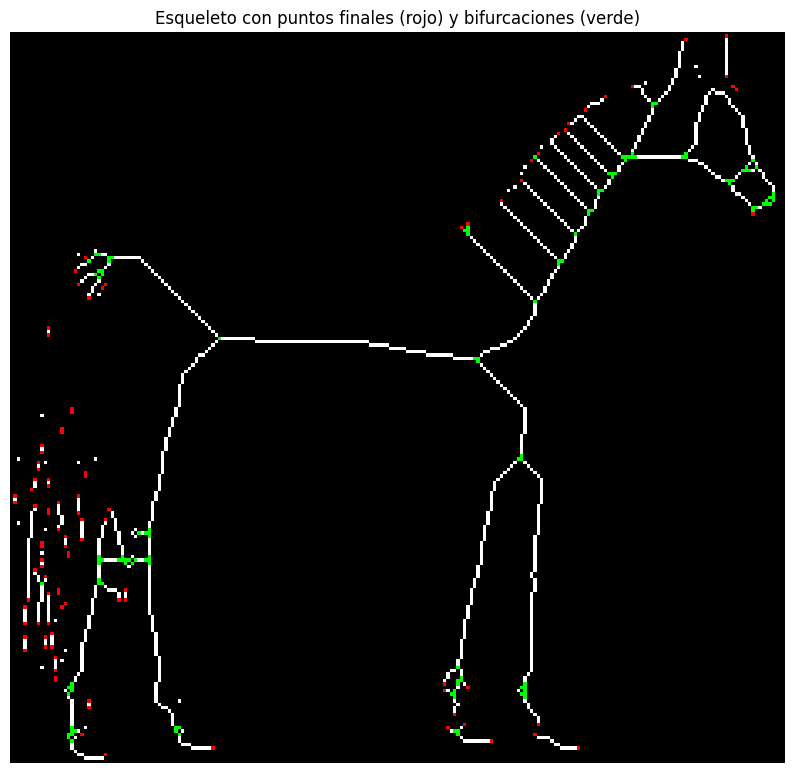

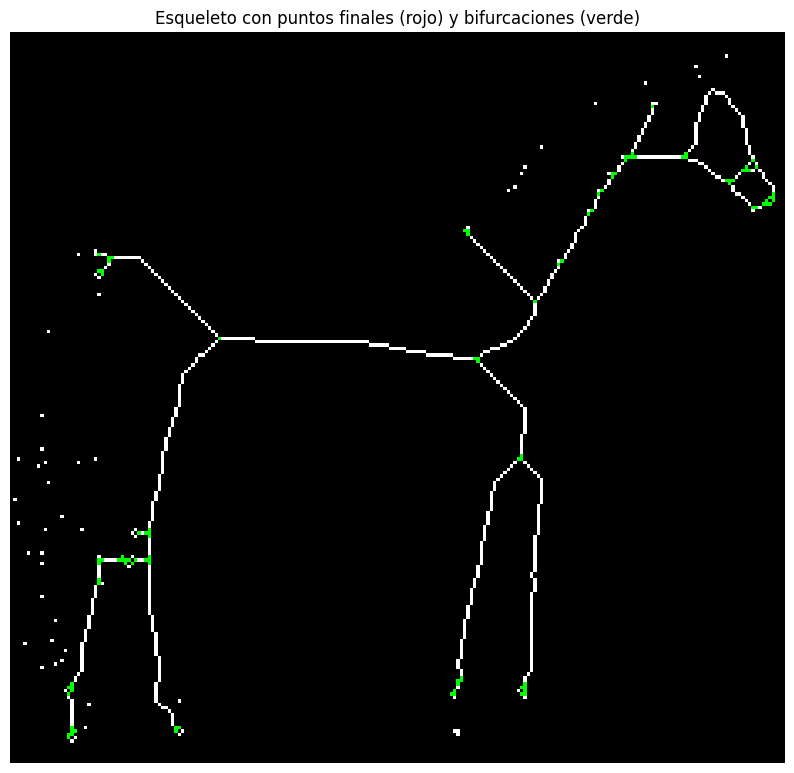

(array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]))

In [410]:
esqueleto_podado = pruning_esqueleto(esqueleto, n_iteraciones=25)
visualizar_puntos_especiales(esqueleto)
visualizar_puntos_especiales(esqueleto_podado)